Matplotlib is building the font cache; this may take a moment.


Estimated True Permeability (k): 0.45867 mD
Klinkenberg Slippage Factor (b): 197.10254


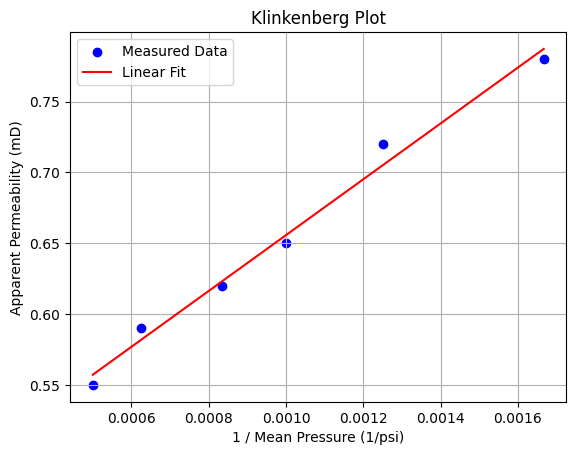

In [1]:
import csv
import matplotlib.pyplot as plt

# Load data from CSV
mean_pressure = []
apparent_permeability = []

with open('klinkenberg_data.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        mean_pressure.append(float(row['mean_pressure']))
        apparent_permeability.append(float(row['apparent_permeability']))

# Step 1: Calculate 1/p for each pressure value
inv_pressure = [1 / p for p in mean_pressure]  # This becomes the X (independent variable)

# Step 2: Prepare values for linear regression formula
n = len(inv_pressure)
sum_x = sum(inv_pressure)                                 # Σx
sum_y = sum(apparent_permeability)                        # Σy
sum_xx = sum(x ** 2 for x in inv_pressure)                # Σx²
sum_xy = sum(x * y for x, y in zip(inv_pressure, apparent_permeability))  # Σxy

# Step 3: Apply standard linear regression formulas
# slope (b) = [n * Σxy - Σx * Σy] / [n * Σx² - (Σx)²]
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)

# intercept (k) = [Σy - slope * Σx] / n
intercept = (sum_y - slope * sum_x) / n

# Print estimated parameters
print(f"Estimated True Permeability (k): {intercept:.5f} mD")
print(f"Klinkenberg Slippage Factor (b): {slope:.5f}")

# Step 4: Generate predicted permeability values
predicted = [intercept + slope * x for x in inv_pressure]

# Step 5: Plot results
plt.scatter(inv_pressure, apparent_permeability, color='blue', label='Measured Data')
plt.plot(inv_pressure, predicted, color='red', label='Linear Fit')
plt.xlabel('1 / Mean Pressure (1/psi)')
plt.ylabel('Apparent Permeability (mD)')
plt.title('Klinkenberg Plot')
plt.legend()
plt.grid(True)
plt.show()
